# MNIST Classification

In [2]:
# Import necessary libraries
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
dataset = mnist.load_data('mnist.db')

11490434/11490434 [==============================] - 3s 0us/step


In [4]:
train,test = dataset

In [5]:
len(train)

2

In [6]:
X_train, y_train = train

In [7]:
X_test, y_test = test

In [8]:
len(X_train)

60000

In [9]:
len(X_test)

10000

In [10]:
X_train[0].shape

(28, 28)

In [11]:
X_train[0].ndim

2

In [12]:
img = X_train[1]

In [13]:
X_train = X_train.reshape(-1,28*28)
#X_train = X_train.reshape(-1, 1, 28*28)

In [14]:
X_train.shape

(60000, 784)

In [15]:
X_test = X_test.reshape(-1, 28*28)

In [16]:
X_test.shape

(10000, 784)

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_train = to_categorical(y_train)

In [19]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [20]:
model=Sequential()

In [21]:
model.add( 
    Dense(units = 512 , input_shape = (784,) , activation = 'relu' )
)
model.add( 
    Dense(units = 256 , activation = 'relu' )
)
model.add( 
    Dense(units = 128 , activation = 'relu' )
)
model.add( 
    Dense(units = 64 , activation = 'relu' )
)
model.add( 
    Dense(units = 10 , activation = 'softmax' )
)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575050 (2.19 MB)
Trainable params: 575050 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(
    optimizer='adam',
    
    loss='categorical_crossentropy',
    
    metrics=['accuracy']
)

In [24]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.7635 - accuracy: 0.8898 - val_loss: 0.2503 - val_accuracy: 0.9295
Epoch 2/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.1865 - accuracy: 0.9469 - val_loss: 0.2186 - val_accuracy: 0.9458
Epoch 3/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.1452 - accuracy: 0.9580 - val_loss: 0.2110 - val_accuracy: 0.9469
Epoch 4/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.1283 - accuracy: 0.9638 - val_loss: 0.1546 - val_accuracy: 0.9599
Epoch 5/10
1500/1500 [==============================] - 23s 16ms/step - loss: 0.1115 - accuracy: 0.9680 - val_loss: 0.1291 - val_accuracy: 0.9643
Epoch 6/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0971 - accuracy: 0.9730 - val_loss: 0.1292 - val_accuracy: 0.9648
Epoch 7/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0814 - accuracy: 0.9770 - val_loss: 0.1616 -

In [25]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, to_categorical(y_test))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.1120 - accuracy: 0.9745
Test Accuracy: 97.45%


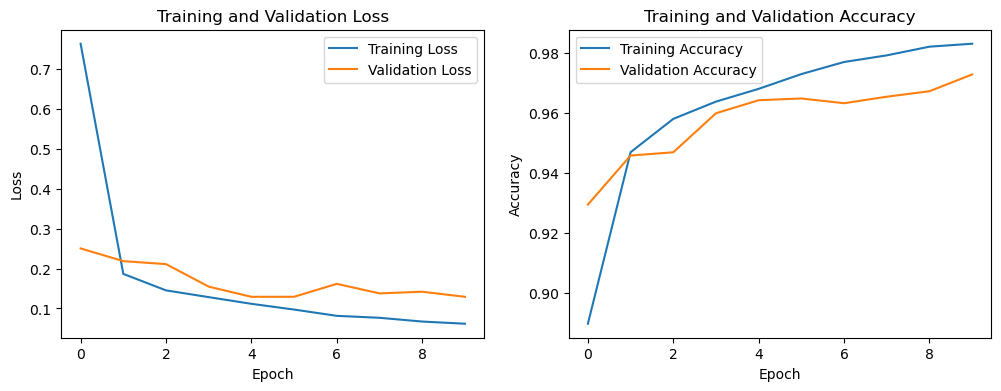

In [26]:
# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

In [27]:
# Predict with the Model:
# Select multiple sample images from the test set (e.g., the first 10 images)
sample_images = X_test

In [28]:
# Use the trained model to make predictions on the selected images
predictions = model.predict(sample_images)

313/313 [==============================] - 1s 3ms/step


In [29]:
# Print the predictions
print(predictions)

[[7.15879667e-13 3.78247889e-13 9.99926442e-07 ... 9.99999046e-01
  1.82711363e-13 2.35996574e-12]
 [4.44540424e-15 2.34702686e-15 1.00000000e+00 ... 1.09798469e-13
  1.11088272e-17 4.23844964e-17]
 [2.50862777e-24 9.99997854e-01 4.73008681e-11 ... 3.39766579e-08
  2.16839112e-06 5.10987953e-11]
 ...
 [4.30629505e-25 3.58189918e-17 1.47413015e-17 ... 4.09342265e-12
  4.21179351e-16 6.03633046e-11]
 [5.23456534e-17 1.66717440e-32 0.00000000e+00 ... 5.98133120e-22
  4.39639249e-17 3.76386295e-25]
 [1.57846112e-17 0.00000000e+00 0.00000000e+00 ... 4.40576847e-36
  1.00209367e-28 1.10366805e-25]]


In [30]:
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

In [31]:
# Print the predicted labels
print("Predicted Labels:", predicted_labels)

Predicted Labels: [7 2 1 ... 4 5 6]


In [32]:
# Generate a confusion matrix and classification report
y_true = y_test
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
confusion = confusion_matrix(y_true, y_pred_labels)
classification_report_str = classification_report(y_true, y_pred_labels)

print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_str)

313/313 [==============================] - 1s 3ms/step
Confusion Matrix:
 [[ 970    0    2    0    1    1    1    1    2    2]
 [   0 1122    0    6    0    1    5    0    1    0]
 [   9    1 1003    7    4    0    1    3    4    0]
 [   1    0    6  971    0   26    0    3    0    3]
 [   1    1    2    0  964    1    5    1    1    6]
 [   4    0    0    1    0  877    6    1    1    2]
 [  13    3    1    0    5    5  931    0    0    0]
 [   0    2   13    2    4    1    0  999    3    4]
 [   6    1    4   10    3    8    2    4  932    4]
 [   3    2    1    3   12    6    1    4    1  976]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.95      0.98      0.96   

313/313 [==============================] - 1s 3ms/step


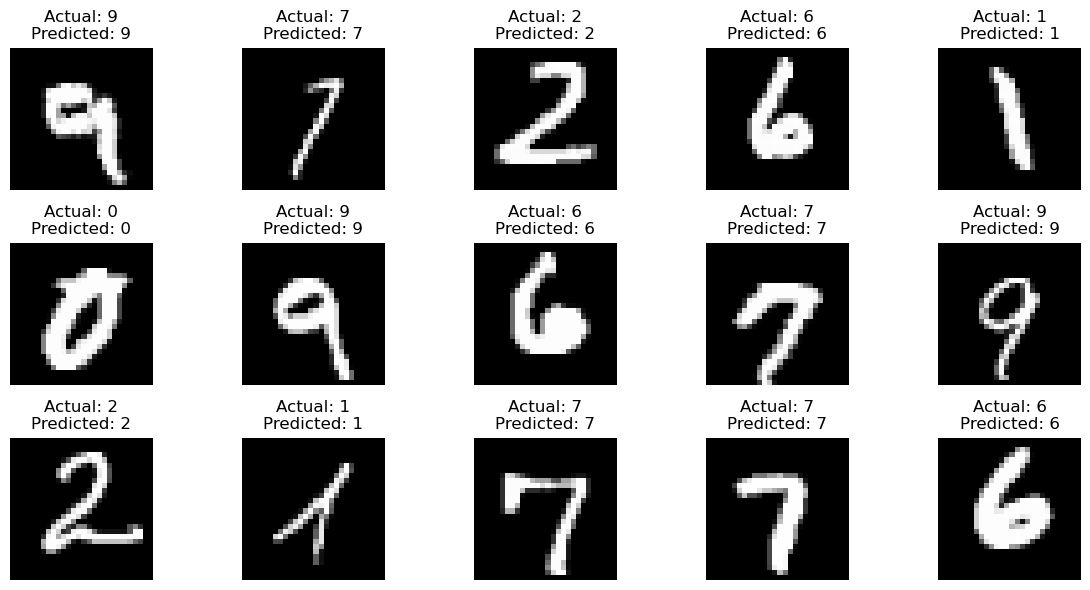

In [33]:
# Use the trained model to make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Select some random test samples (e.g., the first 15)
num_samples_to_display = 15
sample_indices = np.random.choice(len(X_test), num_samples_to_display, replace=False)

# Create a figure to display the comparison
plt.figure(figsize=(12, 6))

for i, sample_index in enumerate(sample_indices):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[sample_index].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {y_test[sample_index]}\nPredicted: {predicted_labels[sample_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()